In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import os
from scipy.sparse import dok_matrix
from scipy.sparse.linalg import svds
import seaborn as sns

## Hands-On 1: Sample Big Dataset 

In [0]:
# load the three files
dir_path = '/content/drive/My Drive/Colab Notebooks/data/sample_dataset'

users = pd.read_csv(
    os.path.join(dir_path, 'users.csv'))
likes = pd.read_csv(
    os.path.join(dir_path, 'likes.csv'))
ul = pd.read_csv(
    os.path.join(dir_path, 'users-likes.csv'))

In [0]:
# check the dimension, head and tail of the dataframe users
print('dim of dataframe users: \n', users.shape)
print('head of dataframe users: \n', users.head())
print('tail of dataframe users: \n', users.tail())

dim of dataframe users: 
 (110728, 9)
head of dataframe users: 
                              userid  gender  age  ...   ext   agr   neu
0  54f34605aebd63f7680e37ffd299af79       0   33  ...  1.17 -1.76  0.61
1  86399f8c44ba54224b2e60177ca89fa9       1   35  ... -0.14  1.49  0.30
2  84fab50f3c60d1fdc83aa91b5e584a78       1   36  ...  0.86  1.07  0.99
3  f3b8fdaccce12ef6352bfad4d6052fe9       0   39  ... -0.33 -0.68  0.92
4  8b06ea5e9cb87c61da387995450607f7       0   31  ...  1.17 -1.01 -0.32

[5 rows x 9 columns]
tail of dataframe users: 
                                   userid  gender  age  ...   ext   agr   neu
110723  b66b3c8bbc513c44ed42510a2d2c89de       1   26  ...  0.54 -1.51  0.56
110724  92f3fb356a32c5313b19c586a314aec4       1   22  ... -0.58 -2.17  0.36
110725  35423376439d56fd234c895495366421       0   33  ...  1.48 -0.84  0.11
110726  ea5865fed26ae706719b1ea338122fa8       1   22  ... -0.71  0.41  0.50
110727  cb6f4e18ee08efd4d6627b047ab2c1cb       0   22  ...  0.48 -1.5

In [0]:
# check the dimension, head and tail of the dataframe users
print('dim of dataframe likes: \n', likes.shape)
print('head of dataframe likes: \n', likes.head())
print('tail of dataframe likes: \n', likes.tail())

dim of dataframe likes: 
 (1580284, 2)
head of dataframe likes: 
                              likeid                                               name
0  3c1636c878e6eb2acfd00c6b61086e38                               REIGN by Paul Gibson
1  feca46ddb8ef04f86172ace0cb7e004c                   Cupcake Wishes & Birthday Dreams
2  b65f46d64c688fe98bdbcf93a76a71fc       Yo también me rei de la caída de otro jejeje
3  9c5c8bb82d2cd46fbd7582f944fe370e  Abraham Joshua Heschel Day School- Alumni Network
4  2d82fa84ad79b085dc516dde154327a2                           Kennesaw Farmer's Market
tail of dataframe likes: 
                                    likeid                                    name
1580279  6d81e47bfcaca7949a011e1029fc1151  Paradise Airbrush Tanning 949.201.5244
1580280  98dd9df34d0975f662a4963b44189fe6                          Outlaw Country
1580281  d168d8b152534056113d70ff3e6badf7                   AND I WAS LIKE, WHAT?
1580282  b3b53121e9ec13634ff4dbd6e2877df4                

In [0]:
# check the dimension, head and tail of the dataframe ul
print('dim of dataframe ul: \n', ul.shape)
print('head of dataframe ul: \n', ul.head())
print('tail of dataframe ul: \n', ul.tail())

dim of dataframe ul: 
 (10612326, 2)
head of dataframe ul: 
                              userid                            likeid
0  71bc7c0901488aec6d30f0add257e7c5  3c1636c878e6eb2acfd00c6b61086e38
1  978ab8e90c4d6ad1a48ef5c973b62f4d  feca46ddb8ef04f86172ace0cb7e004c
2  85123b0e358907725cf19a2cb0ec3983  b65f46d64c688fe98bdbcf93a76a71fc
3  ce110562b3e2f7e5cad3775b32d9caa5  b65f46d64c688fe98bdbcf93a76a71fc
4  8188d20745471273fa69ba44a5b28473  b65f46d64c688fe98bdbcf93a76a71fc
tail of dataframe ul: 
                                     userid                            likeid
10612321  264088faf4884d77e025a4ceda148b73  20458d0f521d4bd3a0903cf2113a43f3
10612322  d498e43d700dbb0006b733aa912e49c7  20458d0f521d4bd3a0903cf2113a43f3
10612323  76ac7130db7f6065c969402226b7053b  20458d0f521d4bd3a0903cf2113a43f3
10612324  05dcd62425918392dc5d42f7550cbd9e  20458d0f521d4bd3a0903cf2113a43f3
10612325  54817b9e5746a560f43dee41c5d459b8  20458d0f521d4bd3a0903cf2113a43f3


## Hands-On 2: Constructing a User-Like Matrix

In [0]:
# count the likes for each user
likes_per_user = ul.groupby(
    by='userid', 
    as_index=False
).count().rename(columns={'likeid': 'count'})[['userid', 'count']]

print(likes_per_user.head().to_string(index=False))
print('\nstatistics summary of likes per user: \n', \
      likes_per_user['count'].describe())

                           userid  count
 00001627067cf12b1923f02bb1a3b731      3
 000097856e2ca6e2cea7edf3ac16734a     21
 00023f140707ca00282e8677e4a2b358      2
 00028c7f6b13f0a125c30ba3ab582504      1
 0002abedba29d5a7fc1d34834b8846d7     53

statistics summary of likes per user: 
 count    110728.000000
mean         95.841395
std         266.786829
min           1.000000
25%           8.000000
50%          22.000000
75%          71.000000
max        7973.000000
Name: count, dtype: float64


In [0]:
# count the users for each like
users_per_like = ul.groupby(
    by='likeid', 
    as_index=False
).count().rename(columns={'userid': 'count'})[['likeid', 'count']]

print(users_per_like.head().to_string(index=False))
print('\nstatistics summary of users per like: \n', \
      users_per_like['count'].describe())

                           likeid  count
 00000a1d0ca9f966fb6e0968f2bf0a06      6
 00000c785a808c8be53f273a540b80d9      1
 00001e7815c3d46269f8c61381980017      1
 000025187cc50105dec140e58676b091      2
 00002856d87251c152dedf48958e70f0      1

statistics summary of users per like: 
 count    1.580284e+06
mean     6.715455e+00
std      7.035188e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.999800e+04
Name: count, dtype: float64


In [0]:
# previous sum of dimensions
sum_dim_pre = users_per_like.shape[0] + likes_per_user.shape[0]

# current sum of dimensions
sum_dim_cur = 0

# repeat until the count becomes stably constant
while(sum_dim_cur != sum_dim_pre):
    # update previous dim
    sum_dim_pre = sum_dim_cur
    
    # trim the userid with count less than 50
    likes_per_user = likes_per_user[
        likes_per_user['count'] >= 50]

    # trim the like with count less than 150
    users_per_like = users_per_like[
        users_per_like['count'] >= 150]
    
    # filter the entries in ul
    ul = ul[
        ul['userid'].isin(likes_per_user['userid']
        ) & ul['likeid'].isin(users_per_like['likeid'])]
    
    # count again
    likes_per_user = ul.groupby(
        by='userid', 
        as_index=False
    ).count().rename(columns={'likeid': 'count'})[['userid', 'count']]
    users_per_like = ul.groupby(
        by='likeid', 
        as_index=False
    ).count().rename(columns={'userid': 'count'})[['likeid', 'count']]
    
    # compute the current dimension
    sum_dim_cur = users_per_like.shape[0] + likes_per_user.shape[0]

In [0]:
# check user (trimmed)
print(likes_per_user.head().to_string(index=False))
print('\nstatistics summary of trimmed likes per user: \n', \
      likes_per_user['count'].describe())

# check like (trimmed)
print(users_per_like.head().to_string(index=False))
print('\nstatistics summary of trimmed users per like: \n', \
      users_per_like['count'].describe())

                           userid  count
 00035a29fa913610d9dfd1c6d6a15fd6    407
 000769fb960a5900187f6631c4bb7264    119
 00082a96ca78b2883a3e24b9e8823567    414
 000bd7a4a05b867dca40edbfc37e474f    227
 00217ff065b47f79902cb8b57b897608    109

statistics summary of trimmed likes per user: 
 count    19742.000000
mean       193.386688
std        243.543937
min         50.000000
25%         69.000000
50%        106.000000
75%        203.000000
max       2487.000000
Name: count, dtype: float64
                           likeid  count
 0001a993cf6b165ab09c448452a4b640    176
 00178dc9c063a70097e686da3bf5a185    209
 001d60059e081f6a70dda1f33ba43c75    480
 001f03652ca11ffa34941c32b1697750    168
 00202926ec450f94d5f21ac34a2761db    602

statistics summary of trimmed users per like: 
 count    8523.000000
mean      447.945559
std       481.273442
min       150.000000
25%       201.000000
50%       290.000000
75%       496.000000
max      8445.000000
Name: count, dtype: float64


In [0]:
# re-index ul and check
ul.reset_index(drop=True, inplace=True)
print(ul)

                                   userid                            likeid
0        10c71363f64b5f682db8a53e62b57e9f  295533f33bf160e76d7e95efadfe196c
1        3c69ac00fb9aaccca4c3b7944a25764c  295533f33bf160e76d7e95efadfe196c
2        099ef4b53135d202fba3f5f73b5377b2  295533f33bf160e76d7e95efadfe196c
3        e7dd4df4ffb64e515698aeb12bfb8f55  295533f33bf160e76d7e95efadfe196c
4        4c20ae4da223eb119e96a23d616f707c  295533f33bf160e76d7e95efadfe196c
...                                   ...                               ...
3817835  6a2e801de204bc57ae70498cf0b3523f  e8f17f0df0440264f2f303ee0b33e4e6
3817836  4f707dd5d50e7e9127fc0463add29211  e8f17f0df0440264f2f303ee0b33e4e6
3817837  1c853a08676c751e0ee00ebfde876e58  e8f17f0df0440264f2f303ee0b33e4e6
3817838  403af82126552207e5e4bdc0276441a1  e8f17f0df0440264f2f303ee0b33e4e6
3817839  bde6013c67e7bd4e2c8336e6e998f38b  e8f17f0df0440264f2f303ee0b33e4e6

[3817840 rows x 2 columns]


In [0]:
# update the tables of users and likes
users = users[users['userid'].isin(likes_per_user['userid'])]
likes = likes[likes['likeid'].isin(users_per_like['likeid'])]

# re-index the two tables
users.reset_index(drop=True, inplace=True)
likes.reset_index(drop=True, inplace=True)

print(users.head())
print(likes.head())

                             userid  gender  age  ...   ext   agr   neu
0  c6a9a43058c8cc8398ca6e97324c0fae       0   47  ... -0.89  0.41  1.17
1  e557fd2902b857797cb8cec471f201a5       0   35  ... -0.64 -1.01 -1.50
2  f9ed42fd1c0e0e1ecd2ba3fdb54ce6fa       1   29  ... -0.77 -1.76  1.05
3  eca69bfad8f4f2b193b2592248101b7f       1   28  ... -0.52 -1.01 -0.51
4  1e4e4517e035a0d5f6dd5bfd1fe65890       0   35  ... -1.02 -0.18  0.30

[5 rows x 9 columns]
                             likeid                                               name
0  295533f33bf160e76d7e95efadfe196c                                            Titanic
1  1e63889fdc82d7f352cbdd51d291d792  I run away when I press a toy at a store and i...
2  8094feaa14c0d9deec6dc1c09b46e43f  If you like me, Tell Me, if you miss me, Show ...
3  9550e2c259723e074ed7d4124754994d                                  The Twilight Zone
4  0346a925081fbb0f3061c0f962c1b1b6                                    Boy Meets World


In [0]:
# build a sparse matrix of the trimmed data

# construct the sparse matrix from matching:
#     (1) ul.userid -- users.userid ===> user_row
#     (2) ul.likeid -- likes.likeid ===> like_row
ul['user_row']= pd.merge(ul, users.reset_index(), 'left')['index']
ul['like_row']= pd.merge(ul, likes.reset_index(), 'left')['index']
print(ul)

                                   userid  ... like_row
0        10c71363f64b5f682db8a53e62b57e9f  ...        0
1        3c69ac00fb9aaccca4c3b7944a25764c  ...        0
2        099ef4b53135d202fba3f5f73b5377b2  ...        0
3        e7dd4df4ffb64e515698aeb12bfb8f55  ...        0
4        4c20ae4da223eb119e96a23d616f707c  ...        0
...                                   ...  ...      ...
3817835  6a2e801de204bc57ae70498cf0b3523f  ...     8522
3817836  4f707dd5d50e7e9127fc0463add29211  ...     8522
3817837  1c853a08676c751e0ee00ebfde876e58  ...     8522
3817838  403af82126552207e5e4bdc0276441a1  ...     8522
3817839  bde6013c67e7bd4e2c8336e6e998f38b  ...     8522

[3817840 rows x 4 columns]


In [0]:
# build sparse matrix
M = dok_matrix((users.shape[0], likes.shape[0]), dtype=np.float32)
for i, j in zip(ul['user_row'], ul['like_row']):
    M[i, j] = 1

In [0]:
# do SVD of k=5
u, s, vt = svds(M, k=5)

# svd for user with k=5
u_svd = pd.DataFrame(
    {'SVD1': u[:, 0], 
     'SVD2': u[:, 1], 
     'SVD3': u[:, 2], 
     'SVD4': u[:, 3], 
     'SVD5': u[:, 4]})
u_svd.index = users['userid']
print(u_svd)

# svd for like with k=3
v = np.transpose(vt)
v_svd = pd.DataFrame(
    {'SVD1': v[:, 0], 
     'SVD2': v[:, 1], 
     'SVD3': v[:, 2], 
     'SVD4': v[:, 3], 
     'SVD5': v[:, 4]})
v_svd.index = likes['name']
print(v_svd)

                                          SVD1      SVD2  ...      SVD4      SVD5
userid                                                    ...                    
c6a9a43058c8cc8398ca6e97324c0fae  1.647394e-03 -0.002739  ... -0.001077 -0.000381
e557fd2902b857797cb8cec471f201a5  1.566017e-03 -0.002617  ... -0.001854 -0.000677
f9ed42fd1c0e0e1ecd2ba3fdb54ce6fa  1.235191e-07  0.000446  ... -0.002661 -0.001134
eca69bfad8f4f2b193b2592248101b7f  2.096964e-03 -0.000538  ... -0.005270 -0.002023
1e4e4517e035a0d5f6dd5bfd1fe65890 -1.632582e-04 -0.000012  ... -0.001757 -0.000610
...                                        ...       ...  ...       ...       ...
3995772c890538007229320216aec92f -2.492625e-04 -0.005034  ... -0.004551 -0.003162
f9a122ccb0ae03e0e67a6024f46d38d9 -1.674307e-02  0.035722  ... -0.019656 -0.007880
8a1c71c937b9a01c6983d86a4396a240 -1.095280e-03 -0.000596  ... -0.003082 -0.001584
d0c8717c1584b4be1a0d28a5e0f25c70  2.451414e-03 -0.001668  ... -0.004057 -0.001469
b7740bea5e9d220a

In [0]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# k is n_components
# alpha=10 is doc_topic_prior
# delta=0.1 is topic_word_prior
lda = LDA(n_components=5, 
          doc_topic_prior=10,  
          topic_word_prior=0.1, 
          random_state=68)
lda.fit(M)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=10, evaluate_every=-1,
                          learning_decay=0.7, learning_method='batch',
                          learning_offset=10.0, max_doc_update_iter=100,
                          max_iter=10, mean_change_tol=0.001, n_components=5,
                          n_jobs=None, perp_tol=0.1, random_state=68,
                          topic_word_prior=0.1, total_samples=1000000.0,
                          verbose=0)

In [0]:
beta_ = np.transpose(lda.components_)

# normalize by column
beta = beta_/beta_.sum(axis=0,keepdims=1)

beta_lda = pd.DataFrame(
    {'LDA1': beta[:, 0], 
     'LDA2': beta[:, 1], 
     'LDA3': beta[:, 2], 
     'LDA4': beta[:, 3], 
     'LDA5': beta[:, 4]})
beta_lda.index = likes['name']
print(beta_lda)

                                                            LDA1  ...          LDA5
name                                                              ...              
Titanic                                             2.123469e-04  ...  3.192447e-05
I run away when I press a toy at a store and it...  3.552084e-06  ...  1.404727e-05
If you like me, Tell Me, if you miss me, Show i...  1.705391e-07  ...  1.045647e-04
The Twilight Zone                                   1.653280e-07  ...  6.831077e-08
Boy Meets World                                     5.242676e-05  ...  8.390420e-06
...                                                          ...  ...           ...
Monsters                                            1.839662e-04  ...  1.357081e-06
Darren Criss                                        1.862998e-05  ...  1.465399e-05
The Princess and the Frog                           2.212141e-04  ...  8.124601e-06
Supernatural                                        7.948187e-04  ...  1.185

In [0]:
# plot log-likelihood for different k of LDA
log_results = []
for i in range(2, 6):
    lda = LDA(n_components=i, 
              doc_topic_prior=10, 
              topic_word_prior=0.1, 
              random_state=68)
    lda.fit(M)
    log_results.append(lda.bound_)

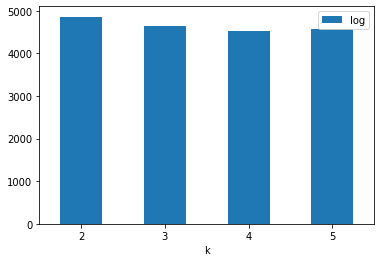

In [0]:
df_logs = pd.DataFrame(
    {'k': range(2, 6), 
     'log': log_results})
ax = df_logs.plot.bar(x='k', y='log', rot=0)
# from the plot we can see that k=4 is optimal

In [0]:
# get the top likes for each of the 5 LDAs
for i in range(1, 6):
    # sort by value in an LDA-column
    lda_colname = 'LDA' + str(i)
    df = beta_lda.sort_values(by=[lda_colname], ascending=False)
    top_10_likes = df.index[:10]

    # print the results
    print(lda_colname, top_10_likes)

LDA1 Index(['Eminem', 'YouTube', 'Rihanna', 'Family Guy', 'Katy Perry', 'Lil Wayne',
       'Lady Gaga', 'Linkin Park', 'Disney', 'Music'],
      dtype='object', name='name')
LDA2 Index(['Family Guy', 'House', 'Music', 'Linkin Park', 'Oreo', 'Skittles',
       'Disney Pixar', 'Lady Gaga', 'Paramore', 'Owl City'],
      dtype='object', name='name')
LDA3 Index(['The Beatles', 'Barack Obama', 'George Takei', 'The Colbert Report',
       'The Daily Show', 'The Onion', 'Amazon.com', 'Music', 'Queen', 'NPR'],
      dtype='object', name='name')
LDA4 Index(['Family Guy', 'Red Hot Chili Peppers', 'Pink Floyd', 'Nirvana',
       'Fight Club', 'The Beatles', 'House', 'System of a Down', 'South Park',
       'Metallica'],
      dtype='object', name='name')
LDA5 Index(['Telling inanimate objects to STAY when they look like they're going to fall',
       'I hate when my parents rush me to get ready and then when I am, they're not',
       'Ok, If we get caught here's the story...',
       'My level 

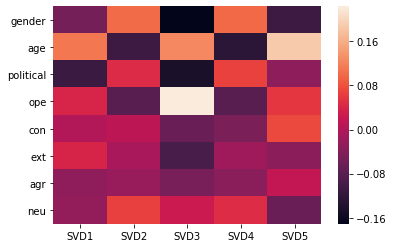

In [0]:
# merge the users and the LDAs
svd_merged = pd.merge(left=users, 
                      right=u_svd, 
                      how='left', 
                      left_on='userid', 
                      right_index=True)

# compute corr
corr = pd.DataFrame()
for corr_row in users.columns[1:]:
    for corr_col in u_svd.columns:
        corr.loc[corr_row, corr_col] = \
            svd_merged.corr().loc[corr_row, corr_col]

# plot corr
sns.heatmap(corr)

In [0]:
# get the top likes for each of the 5 SVDs
for i in range(1, 6):
    # sort by value in an LDA-column
    svd_colname = 'SVD' + str(i)
    df = v_svd.sort_values(by=[svd_colname], ascending=False)
    top_10_likes = df.index[:10]

    # print the results
    print(svd_colname, top_10_likes)

SVD1 Index(['Worst. Idea. Ever. [pause] Let's do it.',
       'Who are you talking to?...... TELL THEM I SAY HI!!!!!!',
       'When you're so good at sarcasm no one can tell if you are serious or not',
       'I forgot your name, so i'm waiting for somebody to say it.',
       'My level of maturity changes depending on who im with.',
       'Dear sleep, I know we had problems when I was younger, but now I love you',
       'Send failed would you like to retry? Well obviously...',
       'Mom I love you... but u be trippin sometimes',
       ' Yea, I saw it on Faceboook.', '...anndd thats why nobody likes you.'],
      dtype='object', name='name')
SVD2 Index(['Linkin Park', 'Paramore', 'Eminem', 'Disturbed', 'Three Days Grace',
       'Breaking Benjamin', 'Family Guy', 'Slipknot', 'Metallica',
       'Avenged Sevenfold'],
      dtype='object', name='name')
SVD3 Index(['Pink Floyd', 'Nirvana', 'Red Hot Chili Peppers', 'Radiohead',
       'Fight Club', 'The Doors', 'Foo Fighters', 'The B